<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information: 

**male:** Gender of patient: male(1) or female(0) 

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler


#### Load the csv file

In [2]:
df=pd.read_csv("Heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df['male']=df['male'].astype('object')
df['currentSmoker']=df['currentSmoker'].astype('object')
df['prevalentStroke']=df['prevalentStroke'].astype('object')
df['prevalentHyp']=df['prevalentHyp'].astype('object')
df['diabetes']=df['diabetes'].astype('object')

In [5]:
df['education']=df['education'].astype('object')
df['BPMeds']=df['BPMeds'].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory usage: 530.1+ KB


In [7]:
df.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4211.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,49.580189,9.005937,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,8.572942,11.922462,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.describe(include=np.object)

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
count,4240,4135.0,4240,4187.0,4240,4240,4240
unique,2,4.0,2,2.0,2,2,2
top,0,1.0,0,0.0,0,0,0
freq,2420,1720.0,2145,4063.0,4215,2923,4131


In [9]:
df.isnull().sum()/len(df) * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
CVD                0.000000
dtype: float64

The columns education, cigsperDay, BPMeds, totChol, BMI, heartRate, glucose have null values in it.

In [10]:
features=df.select_dtypes(np.number).columns
features

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'CVD'],
      dtype='object')

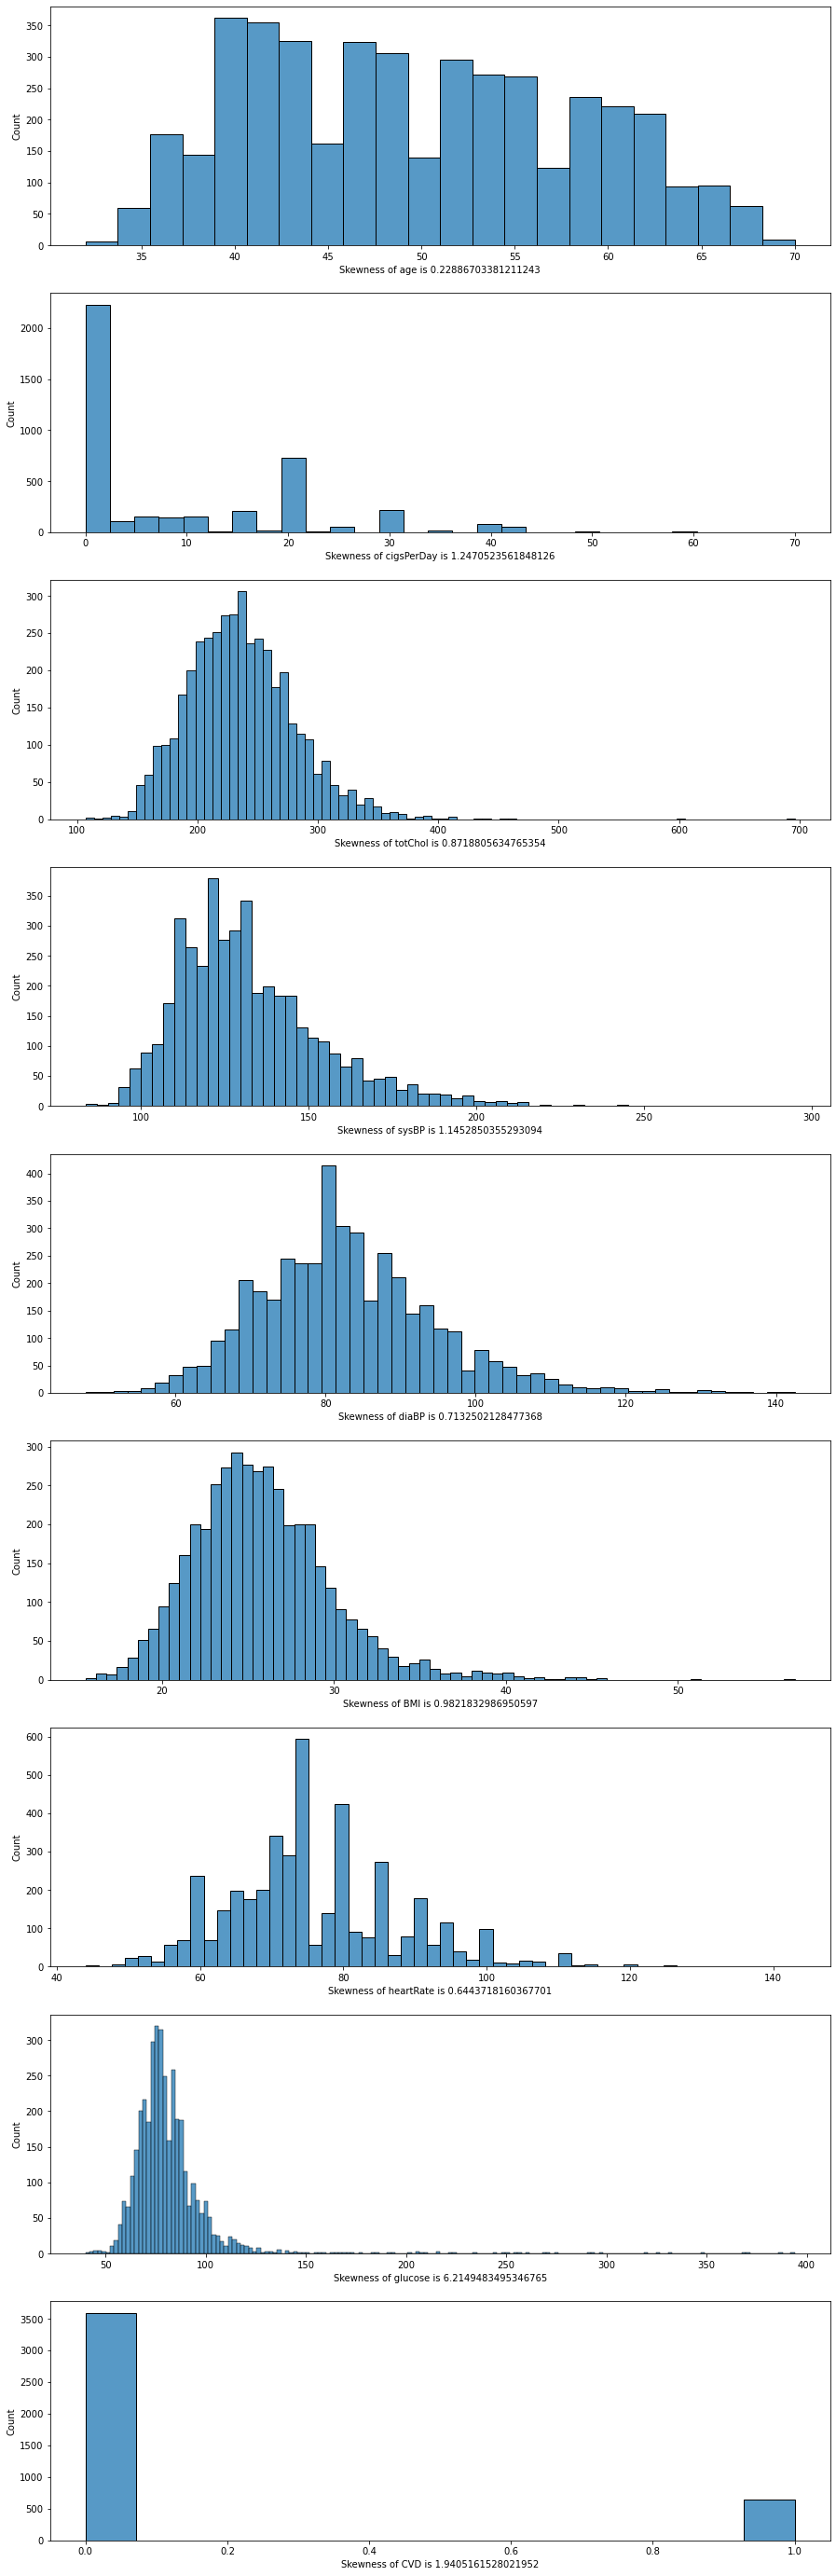

In [11]:
fig,a=plt.subplots(9,1,figsize=(15,50))
for var,subplot in zip(features,a):
    figplot=sns.histplot(df[var],ax=subplot)
    figplot.set_xlabel(f"Skewness of {var} is {df[var].skew()}")
plt.show()

In [12]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)
df['glucose'].fillna(df['glucose'].median(),inplace=True)

df['education'].fillna(df['education'].mode()[0],inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()/len(df) * 100

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
CVD                0.0
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 530.1+ KB


In [15]:
df['education']=df['education'].astype('object')
df['BPMeds']=df['BPMeds'].astype('object')

In [16]:
df_num=df.select_dtypes(np.number)
df_num.columns

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'CVD'],
      dtype='object')

In [17]:
df_cat=df.select_dtypes(np.object)
df_cat.columns

Index(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')

In [18]:
ss = StandardScaler()
df_num_scaled=ss.fit_transform(df_num.drop('CVD',axis=1))
df_num_scaled=pd.DataFrame(data=df_num_scaled, columns=df_num.drop('CVD',axis=1).columns)
df_num_scaled.head(2)

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.234283,-0.751412,-0.940086,-1.196267,-1.083027,0.287693,0.342775,-0.201287
1,-0.417664,-0.751412,0.300797,-0.515399,-0.159355,0.720094,1.590435,-0.245036


In [19]:
df_cat_dummy=pd.get_dummies(df_cat,drop_first=True)
df_cat_dummy.head(2)

,male_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0


In [20]:
df1=pd.concat([df_cat_dummy,df_num_scaled,df['CVD']], axis=1)
df1.head(2)

,male_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,0,0,1,0,0,0,0,0,-1.234283,-0.751412,-0.940086,-1.196267,-1.083027,0.287693,0.342775,-0.201287,0
1,0,1,0,0,0,0,0,0,0,-0.417664,-0.751412,0.300797,-0.515399,-0.159355,0.720094,1.590435,-0.245036,0


In [21]:
df1.shape

(4240, 18)

In [22]:
df1.isnull().sum().sum()

0

### Let's begin with some hands-on practice exercises

<a id="logreg"> </a>
## 1. Logistic regression model

## We shall use the heart disease dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are all the classes of target variable 'CVD' fairly represented by records in the considered dataset ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df['CVD'].value_counts(normalize=True)*100

0    84.811321
1    15.188679
Name: CVD, dtype: float64

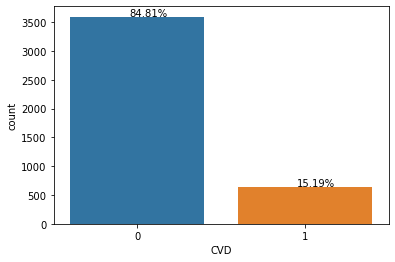

In [24]:
sns.countplot(x=df['CVD'])
plt.text(x=-0.05,y=df['CVD'].value_counts()[0]+1,s=str(round(df['CVD'].value_counts(normalize=True)[0]*100,2))+'%')
plt.text(x= 0.95,y=df['CVD'].value_counts()[1]+1,s=str(round(df['CVD'].value_counts(normalize=True)[1]*100,2))+'%')
plt.show()

Since the spilt of categories in the dataset is 85:15. We can say that the data set is marginally imbalanced but can be used.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Predict whether or not a patient will have cardiovascular disease based on the information about blood pressure of the patient. Columns related to blood pressure are diaBP, sysBP and BPMeds.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df1.columns

Index(['male_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'CVD'],
      dtype='object')

In [26]:
X=df1[['BPMeds_1.0','sysBP','diaBP']]
y=df1['CVD']

In [27]:
Xc=sm.add_constant(X)

In [28]:
logmod=sm.Logit(y,Xc).fit()
logmod.summary()

Optimization terminated successfully.
         Current function value: 0.404139
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            3
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.05125
Time:                        18:05:58   Log-Likelihood:                -1713.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 6.935e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8258      0.046    -39.319      0.000      -1.917      -1.735
BPMeds_1.0     0.3199      0.212      1.509      0.131      -0.096       0.735
sysBP          0.6108      0.064      9.568      0.000       0.486       0.736
diaBP         -0.1288      0.065     -1.989      0.047      -0.256      -0.002
==============================================================================
"""

Since LLR p value < 0.05 therefore we can say that model is significant or possible. Therefore we can predict if a person will have CVD or not based on the information of Blood pressure but the prediction accuracy will be low. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Predict whether or not a patient has cardiovascular disease using the categorical variables in the dataset. How does a unit change in each feature influence the odds of a patient having a cardiocascular disease?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
X=df1.iloc[:,0:9]
y=df1['CVD']

In [30]:
Xc=sm.add_constant(X)

In [31]:
logmod=sm.Logit(y,Xc).fit()
logmod.summary()

Optimization terminated successfully.
         Current function value: 0.400771
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4230
Method:                           MLE   Df Model:                            9
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.05915
Time:                        18:05:58   Log-Likelihood:                -1699.3
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 4.488e-41
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2460      0.099    -22.678      0.000      -2.440      -2.052
male_1                0.4644      0.091      5.077      0.000       0.285       0.644
education_2.0        -0.4467      0.109     -4.085      0.000      -0.661      -0.232
education_3.0        -0.2876      0.133     -2.164      0.030      -0.548      -0.027
education_4.0        -0.2353      0.147     -1.599      0.110      -0.524       0.053
currentSmoker_1       0.1726      0.091      1.889      0.059      -0.007       0.352
BPMeds_1.0            0.4957      0.210      2.363      0.018       0.084       0.907
prevalentStroke_1     1.0361      0.428      2.421      0.015       0.197       1.875
prevalentHyp_1        0.8904      0.092      9.646      0.000       0.709       1.071
diabetes_1            1.0060      0.211      4.762      0.000       0.592       1.420
=====================================================================================
"""

Since LLR p value < 0.05, we can say that model is possible.

In [32]:
print("When the features above are true the odds of having CVD is given by")
odds = pd.DataFrame(np.exp(logmod.params),columns=['Odds'])
odds

When the features above are true the odds of having CVD is given by


,Odds
const,0.105827
male_1,1.590985
education_2.0,0.639709
education_3.0,0.750057
education_4.0,0.790348
currentSmoker_1,1.188435
BPMeds_1.0,1.641682
prevalentStroke_1,2.818108
prevalentHyp_1,2.436160
diabetes_1,2.734646


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Predit if a patient has cardiovascular disease based on whether or not the patient has history of hypertension. Calculate the odds ratio.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
df1.columns

Index(['male_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'CVD'],
      dtype='object')

In [34]:
X=df1['prevalentHyp_1']
y=df1['CVD']

In [35]:
Xc=sm.add_constant(X)

In [36]:
logmod=sm.Logit(y,Xc).fit()
logmod.summary()

Optimization terminated successfully.
         Current function value: 0.411192
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 0.03469
Time:                        18:05:58   Log-Likelihood:                -1743.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 4.370e-29
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.0996      0.059    -35.395      0.000      -2.216      -1.983
prevalentHyp_1     0.9837      0.087     11.281      0.000       0.813       1.155
==================================================================================
"""

Since LLR p value < 0.05, therefore model is possible

In [37]:
np.exp(logmod.params)

const             0.122504
prevalentHyp_1    2.674373
dtype: float64

If a person has hypertension histort the odds of having CVD increases by 2.6 times.

<a id="mod_eval"> </a>
## 2. Model Evaluation Metrics

In [38]:
from sklearn.model_selection import train_test_split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a full model to predict if a patient will have a cardiovascular disease. Find the value of Mcfadden's R<sup>2</sup>.
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
X=df1.drop('CVD',axis=1)
y=df1['CVD']

In [40]:
Xc=sm.add_constant(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.2, random_state=1)

In [42]:
logmod=sm.Logit(y_train,X_train).fit()
logmod.summary()

Optimization terminated successfully.
         Current function value: 0.378522
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3374
Method:                           MLE   Df Model:                           17
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.1101
Time:                        18:05:58   Log-Likelihood:                -1283.9
converged:                       True   LL-Null:                       -1442.8
Covariance Type:            nonrobust   LLR p-value:                 2.422e-57
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2602      0.137    -16.453      0.000      -2.529      -1.991
male_1                0.5792      0.113      5.136      0.000       0.358       0.800
education_2.0        -0.2024      0.129     -1.566      0.117      -0.456       0.051
education_3.0        -0.0286      0.155     -0.185      0.853      -0.332       0.274
education_4.0         0.0398      0.170      0.234      0.815      -0.294       0.374
currentSmoker_1       0.0114      0.158      0.072      0.943      -0.299       0.322
BPMeds_1.0            0.3349      0.240      1.394      0.163      -0.136       0.806
prevalentStroke_1     0.2920      0.589      0.496      0.620      -0.862       1.446
prevalentHyp_1        0.2391      0.145      1.654      0.098      -0.044       0.522
diabetes_1            0.1800      0.323      0.557      0.577      -0.453       0.813
age                   0.4632      0.060      7.661      0.000       0.345       0.582
cigsPerDay            0.2549      0.073      3.480      0.001       0.111       0.398
totChol               0.0879      0.050      1.747      0.081      -0.011       0.186
sysBP                 0.3501      0.087      4.007      0.000       0.179       0.521
diaBP                -0.0733      0.080     -0.922      0.357      -0.229       0.083
BMI                   0.0186      0.054      0.343      0.731      -0.088       0.125
heartRate            -0.0005      0.052     -0.009      0.993      -0.102       0.101
glucose               0.1628      0.055      2.940      0.003       0.054       0.271
=====================================================================================
"""

In [43]:
print("Mcfadden R2:", logmod.prsquared)

Mcfadden R2: 0.11011255488602711


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the significant variables in the full model when all the variables are considered in prediction of whether or not a patient has cardiovascular disease.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
sig=pd.DataFrame(logmod.pvalues, columns=['P values'])
sig[sig['P values']<0.05]

,P values
const,8.029807e-61
male_1,2.808050e-07
age,1.840901e-14
cigsPerDay,5.014205e-04
sysBP,6.145079e-05
glucose,3.280001e-03


In [45]:
## Using backward elimination

In [46]:
cols=list(Xc.columns)
while(len(cols)>0):
    X1=X_train[cols]
    logmod=sm.Logit(y_train,X1).fit()
    pval=logmod.pvalues
    pval=pval.drop('const')
    maxp=pval.max()
    feature=pval.idxmax()
    if maxp > 0.05:
        cols.remove(feature)
        print("Features removed: ",feature)
    else:
        break

cols

Optimization terminated successfully.
         Current function value: 0.378522
         Iterations 7
Features removed:  heartRate
Optimization terminated successfully.
         Current function value: 0.378522
         Iterations 7
Features removed:  currentSmoker_1
Optimization terminated successfully.
         Current function value: 0.378522
         Iterations 7
Features removed:  education_3.0
Optimization terminated successfully.
         Current function value: 0.378528
         Iterations 7
Features removed:  education_4.0
Optimization terminated successfully.
         Current function value: 0.378539
         Iterations 7
Features removed:  BMI
Optimization terminated successfully.
         Current function value: 0.378557
         Iterations 7
Features removed:  prevalentStroke_1
Optimization terminated successfully.
         Current function value: 0.378592
         Iterations 7
Features removed:  diabetes_1
Optimization terminated successfully.
         Current function va

['const', 'male_1', 'age', 'cigsPerDay', 'sysBP', 'glucose']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How do the coefficients of each feature form the dataset impact the odds of a patient having a cardiovascular disease?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
logmod=sm.Logit(y_train,X_train[cols]).fit()
print("The odds of having CVD w.r.t the featurs are: \n",np.exp(logmod.params))

Optimization terminated successfully.
         Current function value: 0.380422
         Iterations 6
The odds of having CVD w.r.t the featurs are: 
 const         0.110389
male_1        1.756015
age           1.652528
cigsPerDay    1.291962
sysBP         1.492146
glucose       1.198581
dtype: float64


<a id="perf_eval"> </a>
## 3. Performance evaluation metrics

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
#full model
logmod=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.378522
         Iterations 7


In [50]:
y_pred_prob=logmod.predict(X_test)
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

In [51]:
cm_mtx=confusion_matrix(y_test,y_pred)

In [52]:
cm=pd.DataFrame(cm_mtx, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
cm

,Predicted 0,Predicted 1
Actual 0,714,4
Actual 1,124,6


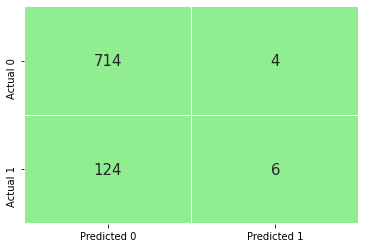

In [53]:
sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap=ListedColormap(['lightgreen']),linewidths=0.1,annot_kws={'size':15})
plt.show()

In [54]:
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]
FN=cm.iloc[1,0]
TN=cm.iloc[0,0]

In [55]:
acc=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy :",acc)

Accuracy : 0.8490566037735849


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.  Calculate value of kappa for the full model built in question 5. Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
from sklearn.metrics import cohen_kappa_score

In [57]:
y_pred = [0 if x<0.18 else 1 for x in y_pred_prob]

In [58]:
cohen_kappa_score(y_test,y_pred)

0.24920543632896452

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Identify the features from the dataset that are involved in multicollinearity. After that, split the updated data using train_test_split.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [60]:
VIF = [vif(Xc.values,i) for i in range(Xc.shape[1])]

In [61]:
pd.DataFrame(VIF, index=Xc.columns, columns=['VIF'])

,VIF
const,6.860519
male_1,1.212729
education_2.0,1.274973
education_3.0,1.204366
education_4.0,1.164403
currentSmoker_1,2.455588
BPMeds_1.0,1.101298
prevalentStroke_1,1.019169
prevalentHyp_1,2.053425
diabetes_1,1.589691


Since all the values have VIF < 10, we can say there is no multicollinearity present.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.2, random_state=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Use the data obtained from Q10 and identify 5 features that contribute most in the prediction of target variable.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [64]:
logreg=LogisticRegression()
rfe=RFE(estimator=logreg, n_features_to_select=5)

In [65]:
rfe.fit(X_train.iloc[:,1:],y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [66]:
rfe_feature=pd.DataFrame(rfe.ranking_, index=X_train.iloc[:,1:].columns,columns=['Rank']).sort_values('Rank',ascending=True)
rfe_feature[rfe_feature['Rank']==1]

,Rank
male_1,1
sysBP,1
age,1
BPMeds_1.0,1
diabetes_1,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a model using the features obtained in question 11. For the model find: 
                        <ol>                       
                         <li>Accuracy</li>
                        <li>F<sub>1</sub> score</li>
                        </ol>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
from sklearn.metrics import classification_report

In [68]:
cols=rfe_feature[rfe_feature['Rank']==1].index
cols.tolist()

['male_1', 'sysBP', 'age', 'BPMeds_1.0', 'diabetes_1']

In [69]:
logmod=sm.Logit(y_train,X_train[cols]).fit()

Optimization terminated successfully.
         Current function value: 0.588080
         Iterations 5


In [70]:
y_pred_prob=logmod.predict(X_test[cols])
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [71]:
rep=classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       718
           1       0.23      0.36      0.28       130

    accuracy                           0.72       848
   macro avg       0.55      0.57      0.55       848
weighted avg       0.77      0.72      0.74       848



In [72]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[560, 158],
       [ 83,  47]], dtype=int64)

In [73]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

accuracy=(TP+TN)/(TP+FP+FN+TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score=(2*(precision*recall))/(precision+recall)

print("Accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)
print("f1_score :",f1_score)


Accuracy : 0.7158018867924528
precision : 0.22926829268292684
recall : 0.36153846153846153
f1_score : 0.28059701492537314


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Compare the full model in question 5 and the model built in question 12 using their ROC curves. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
logmod_5=sm.Logit(y_train,X_train).fit()
logmod_12=sm.Logit(y_train,X_train[cols]).fit()

Optimization terminated successfully.
         Current function value: 0.378522
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.588080
         Iterations 5


In [75]:
y_prob5=logmod_5.predict(X_test)

In [76]:
y_prob12=logmod_12.predict(X_test[cols])

Text(0.5, 0, 'Model with best 5 features')

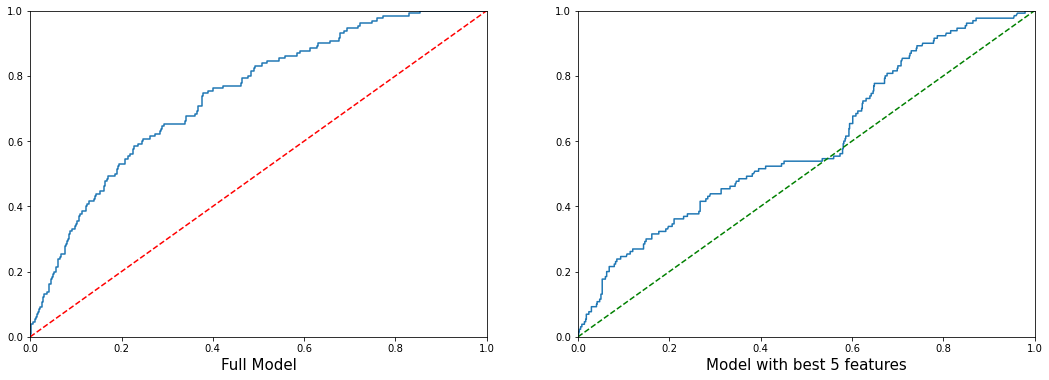

In [77]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
fpr,tpr,threshold=roc_curve(y_test,y_prob5)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("Full Model",fontdict={'size':15})

plt.subplot(1,2,2)
fpr,tpr,threshold=roc_curve(y_test,y_prob12)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'g--')
plt.xlabel("Model with best 5 features",fontdict={'size':15})

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a logistic regression model using information about heart rate of the patients. Compute the AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
from sklearn.metrics import roc_auc_score

In [93]:
logmod=sm.Logit(y_train,X_train['heartRate']).fit()

Optimization terminated successfully.
         Current function value: 0.693054
         Iterations 3


In [94]:
y_prob=logmod.predict(X_test['heartRate'])


In [95]:
roc_auc_score(y_test,y_prob)

0.4763445468180844

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Calculate the cross entropy for the model built in question 14.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
from sklearn.metrics import log_loss

In [98]:
y_pred=[0 if x<0.5 else 1 for x in y_prob]

In [101]:
print('Cross entropy from the above model is', log_loss(y_test,y_pred))

Cross entropy from the above model is 14.948065591742047


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Compare the model built in question 14 to the full model built in question 5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
print("The AUC score of full model", roc_auc_score(y_test,y_prob5))

The AUC score of full model 0.7412899078637241


In [103]:
print("The AUC score of model in question 14 is", roc_auc_score(y_test,y_prob))

The AUC score of model in question 14 is 0.4763445468180844


In [104]:
logmod_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3374
Method:                           MLE   Df Model:                           17
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.1101
Time:                        19:30:46   Log-Likelihood:                -1283.9
converged:                       True   LL-Null:                       -1442.8
Covariance Type:            nonrobust   LLR p-value:                 2.422e-57
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2602      0.137    -16.453      0.000      -2.529      -1.991
male_1                0.5792      0.113      5.136      0.000       0.358       0.800
education_2.0        -0.2024      0.129     -1.566      0.117      -0.456       0.051
education_3.0        -0.0286      0.155     -0.185      0.853      -0.332       0.274
education_4.0         0.0398      0.170      0.234      0.815      -0.294       0.374
currentSmoker_1       0.0114      0.158      0.072      0.943      -0.299       0.322
BPMeds_1.0            0.3349      0.240      1.394      0.163      -0.136       0.806
prevalentStroke_1     0.2920      0.589      0.496      0.620      -0.862       1.446
prevalentHyp_1        0.2391      0.145      1.654      0.098      -0.044       0.522
diabetes_1            0.1800      0.323      0.557      0.577      -0.453       0.813
age                   0.4632      0.060      7.661      0.000       0.345       0.582
cigsPerDay            0.2549      0.073      3.480      0.001       0.111       0.398
totChol               0.0879      0.050      1.747      0.081      -0.011       0.186
sysBP                 0.3501      0.087      4.007      0.000       0.179       0.521
diaBP                -0.0733      0.080     -0.922      0.357      -0.229       0.083
BMI                   0.0186      0.054      0.343      0.731      -0.088       0.125
heartRate            -0.0005      0.052     -0.009      0.993      -0.102       0.101
glucose               0.1628      0.055      2.940      0.003       0.054       0.271
=====================================================================================
"""

In [105]:
logmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3391
Method:                           MLE   Df Model:                            0
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 -0.6293
Time:                        19:31:13   Log-Likelihood:                -2350.8
converged:                       True   LL-Null:                       -1442.8
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
heartRate      0.0273      0.034      0.796      0.426      -0.040       0.094
==============================================================================
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What is the cross entropy for the full model? Use the full model in Q5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
y_pred5=[0 if x<0.5 else 1 for x in y_prob5]

In [107]:
print('Cross entropy from the above model is', log_loss(y_test,y_pred5))

Cross entropy from the above model is 5.213403982238548


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Predict whether a patient has cardiovascular disease based on smoking habits of the patient. For the model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
X.columns

Index(['male_1', 'education_2.0', 'education_3.0', 'education_4.0',
       'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
       'diabetes_1', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [85]:
logmod=sm.Logit(y_train,X_train[['currentSmoker_1','cigsPerDay']]).fit()
logmod.summary()

Optimization terminated successfully.
         Current function value: 0.478792
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 3392
Model:                          Logit   Df Residuals:                     3390
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                 -0.1256
Time:                        18:06:02   Log-Likelihood:                -1624.1
converged:                       True   LL-Null:                       -1442.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
currentSmoker_1    -2.9928      0.103    -29.170      0.000      -3.194      -2.792
cigsPerDay          1.2426      0.054     22.803      0.000       1.136       1.349
===================================================================================
"""

In [86]:
y_prob=logmod.predict(X_test[['currentSmoker_1','cigsPerDay']])
y_pred=[0 if x<0.5 else 1 for x in y_prob]

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       718
           1       0.19      0.04      0.06       130

    accuracy                           0.83       848
   macro avg       0.52      0.50      0.48       848
weighted avg       0.75      0.83      0.78       848



<a id="opt"> </a>
## 4. Determining optimal threshold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the optimal value threshold for the full model using the Youden's index.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
fpr,tpr,threshold=roc_curve(y_test,y_prob5)

In [89]:
youden=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':threshold})

In [90]:
youden['Difference']=youden['tpr']-youden['fpr']
table=youden.sort_values(by='Difference',ascending=False).reset_index(drop=True)
table.head()

,fpr,tpr,threshold,Difference
0,0.378830,0.746154,0.138863,0.367324
1,0.389972,0.753846,0.134783,0.363874
2,0.376045,0.738462,0.139545,0.362417
3,0.292479,0.653846,0.165840,0.361367
4,0.246518,0.607692,0.183250,0.361174


So as per the youden's index criteria the best threshold value is 0.138863

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the costs of false negatives and false positives as 3 and 1.3 respectively to obtain the optimal cut-off probability for which the total cost will be minimum.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
df_cost_table=pd.DataFrame(columns=['Total_Cost','cutoff'])

In [131]:
def calculate(y_t,y_p,c_1,c_2):
    cm=confusion_matrix(y_t,y_p)
    cm_array=np.array(cm)
    return cm_array[1,0]*c_1+cm_array[0,1]*c_2

In [133]:
j=0
for i in range(10,100):
    y_pred5=[0 if x<(i/100) else 1 for x in y_prob5]
    cost=calculate(y_test,y_pred5,3,1.3)
    df_cost_table.loc[j]=[cost,i/100]
    j+=1

In [136]:
df_cost_table[df_cost_table['Total_Cost']==df_cost_table['Total_Cost'].min()]

,Total_Cost,cutoff
16,346.1,0.26
